In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('accidents_cleanV2.csv')

In [3]:
df.head(2)

,x,y,objectid,radicado,fecha,hora,dia,periodo,clase,direccion,...,mes,mes_nombre,x_magnamed,y_magnamed,longitud,latitud,file,shape,fecha_incidente,hora_incidente
0,-75.602726,6.219016,211279,1423828,2014/01/01 00:00:00+00,02:20:00,1,2014,Choque,CR 80 CL 8,...,1,NaN,831190.08,1179689.50,-75.602726,6.219016,Accidentalidadgeorreferenciada2014.csv,NaN,2014-01-01,7.0
1,-75.568185,6.260009,211280,1423839,2014/01/01 00:00:00+00,12:50:00,1,2014,Atropello,CR 53 CL 61,...,1,NaN,835013.63,1184223.79,-75.568185,6.260009,Accidentalidadgeorreferenciada2014.csv,NaN,2014-01-01,5.0


### 1.	How have the number of accidents fluctuated over the past year and a half? Have they increased over the time?

In [4]:
#DATE to datetime format
df["fecha_incidente"] = pd.to_datetime(df["fecha_incidente"])

In [5]:
#prueba = prueba.index.to_period("M")
df["PERIOD"] = df["fecha_incidente"].dt.to_period('M')
#Create WeekDay
df["WEEKDAY"] = df.fecha_incidente.dt.weekday

df = df.set_index('fecha_incidente')

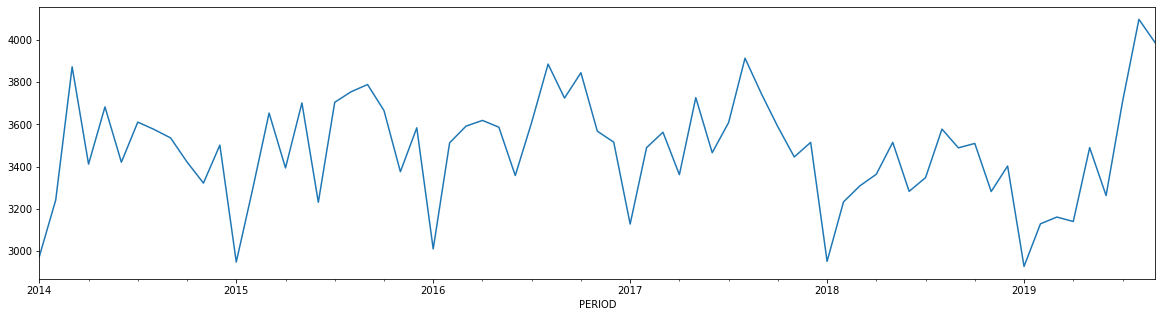

In [9]:
#How have the number of accidents fluctuated over the past two years? Have the increase over the time?
#Line Plot - Last two years.
fig, ax = plt.subplots(figsize=(20,5))
df.loc['2014-01-01':'2019-09-30'].groupby("PERIOD")["radicado"].count().plot(ax=ax)


### 2.	For any particular day, during which hours are accidents most likely to occur?

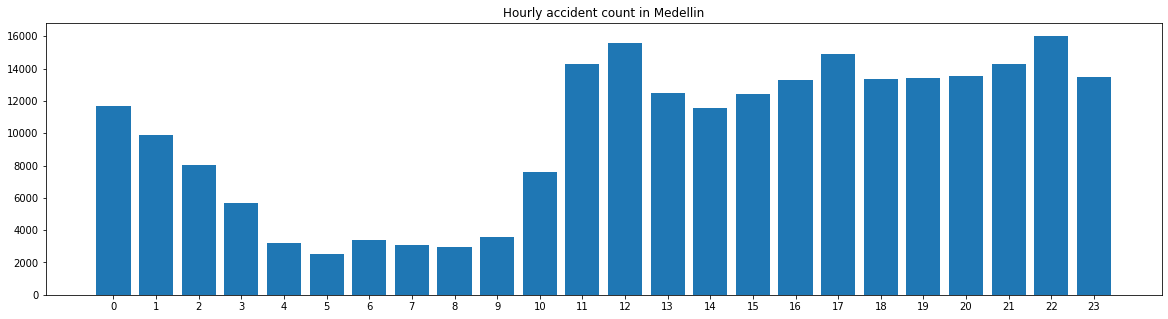

CPU times: user 740 ms, sys: 35.6 ms, total: 776 ms
Wall time: 1.41 s


array([16022, 15557, 14914, 14305, 14273, 13567, 13487, 13403, 13369,
       13300, 12508, 12420, 11705, 11583,  9864,  8035,  7575,  5654,
        3568,  3401,  3185,  3113,  2937,  2495])

In [16]:
%%time
x=df['hora_incidente'].value_counts(dropna=True)
HourlyCount=plt.figure(figsize=(20,5))
ax = HourlyCount.add_subplot(111)
plt.bar(x.index, x.values)
plt.xticks(x.index)
plt.title("Hourly accident count in Medellin")
plt.show()
x.values

Accidents are most likely to occur in the afternoon.

3.	Are there more accidents on weekdays than weekends?3.	Are there more accidents on weekdays than weekends?

In [11]:
# Los nombres de los días son strings con 9 caracteres
df['dia_nombre']=df['dia_nombre'].apply(lambda x: x.replace(' ', ''))

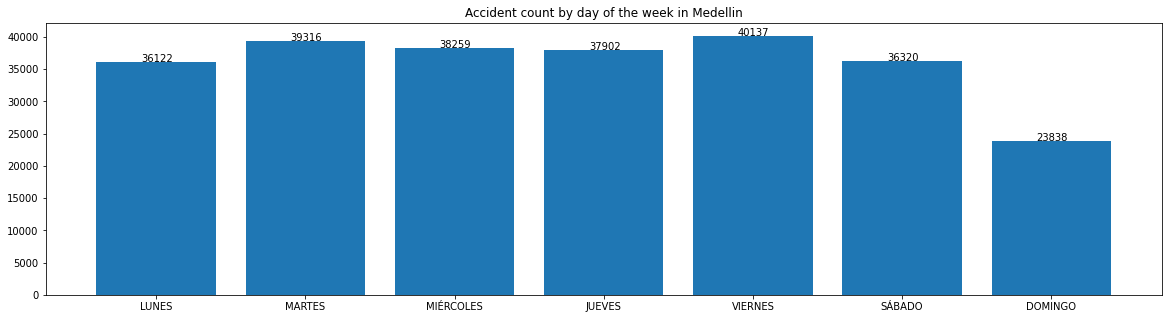

CPU times: user 597 ms, sys: 58.1 ms, total: 656 ms
Wall time: 1.08 s


In [17]:
%%time
x=df['dia_nombre'].value_counts()
OrderedDays = ['LUNES', 'MARTES', 'MIÉRCOLES', 'JUEVES', 'VIERNES', 'SÁBADO', 'DOMINGO']
AccidentCount = [x[i] for i in OrderedDays]
DayOfWeekCount=plt.figure(figsize=(20,5))
ax = DayOfWeekCount.add_subplot(111)
plt.bar(OrderedDays, AccidentCount)
plt.xticks(x.index)
plt.title("Accident count by day of the week in Medellin")
for i in ax.patches:
    ax.text(i.get_x()+0.3, i.get_height()+30, i.get_height())
plt.show()

Accidents are more likely to occur during the weekdays. We can conclude that friday is the highest accidentality weekday.